In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('TkAgg') # do this before importing pylab

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

def animate(data):
    tstart = time.time()
    im = plt.scatter(*pqarr[i], s=1)
    #im=plt.imshow(data)

    for i in np.arange(1,200):
        data=np.random.randn(10,10)
        im.set_data(data)
        fig.canvas.draw()                         # redraw the canvas
    print ('FPS:' , 200/(time.time()-tstart))

win = fig.canvas.manager.window
fig.canvas.manager.window.after(100, animate)
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/daniele/miniconda3/envs/tf_base/lib/python3.6/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/daniele/miniconda3/envs/tf_base/lib/python3.6/tkinter/__init__.py", line 749, in callit
    func(*args)
TypeError: animate() missing 1 required positional argument: 'data'


In [115]:
plt.scatter(*pqarr[i], s=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


# Set up the figure
fig = plt.figure(1)
# Creat two lines to be updates in the animation. 
l1, = plt.plot([],[],'r',lw=1.5)
l2, = plt.plot([],[],'k',lw=1.5)
plt.legend(['Analytical','Bathymetry'], loc='upper center',fancybox=True,prop={'size':12})
plt.ylabel('Free Surface [m]',fontsize=12)
plt.xlabel('Distance [m]',fontsize=12)
plt.axis([-2.5,2.5,-0.2,0.25])
plt.title ('Initial conditions for planar surface',fontsize=15)

# Initialization function
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    return l1,l2

# This function is called at each iteration of the animation.     
def update(t):
    x = np.arange(-3,3,0.1)
    x1 = np.arange(-3,3,0.1)

    maxfs = 0.1 * np.sin(x * t)
    zf1 = 0.1 * np.cos(x * t)

    # Update lines with new data. 
    l1.set_data(x,maxfs)
    l2.set_data(x1,zf1)
    return l1,l2

# Create animation
ani = animation.FuncAnimation(fig, update, frames = 10, blit=True, init_func = init)

plt.show()

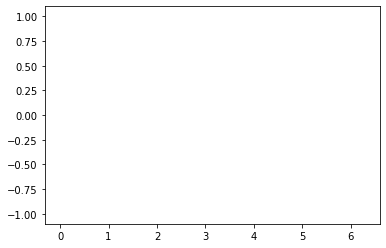

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()